In [1]:
import numpy as np
import scipy as sp
from scipy import special
from scipy.interpolate import CubicSpline
import astropy
from astropy.cosmology import FlatLambdaCDM
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
matplotlib.rc('text', usetex = True)
from numpy import save

In [2]:
k = np.load('../Axion-main/k_ns_fdc.npy')[:,:,:,::-1]
pk = np.load('../Axion-main/pk_ns_fdc.npy')[:,:,:,::-1]

In [3]:
print(np.shape(k))
print(np.shape(pk))

(1, 25, 301, 657)
(1, 25, 301, 657)


In [4]:
fv = [0.02233,0.1198,0.0001,10**-27,67.37,0.9652]
#parameter confidence intervals as given in table 3 of Planck 2015 (arxiv 1502.01589)
ci = [0.00016,0.0015,'n/a','n/a',0.66,0.0049]
#number of axioncamb runs for each parameter
runs = 25
#run values for omega_baryon
omegab = np.round(np.linspace(fv[0]-10*ci[0],fv[0]+10*ci[0],runs),5)
#run values for omega_cdm
omegac = np.round(np.linspace(fv[1]-10*ci[1],fv[1]+10*ci[1],runs),4)
#run values for omega_cdm and omega_axion used to run the desired axion fractions
fa = np.linspace(0.0001,0.025,runs)
omegaax = fv[1]*fa
omegac2 = fv[1]-omegaax
fa_zip = zip(omegac2,omegaax)
#run values for hubble constant
h0 = np.round(np.linspace(fv[4]-ci[4],fv[4]+ci[4],runs),2)
#run values for scalar tilt
ns = np.round(np.linspace(fv[5]-ci[5],fv[5]+ci[5],runs),4)
#run values for axion mass
ma = np.logspace(-29,-22,11)
params = []
params.append(omegab)
params.append(omegac)
params.append(fa)
params.append(ns)
params.append(h0)

In [5]:
for i in range(5):
    print(params[i])

[0.02073 0.02086 0.021   0.02113 0.02126 0.0214  0.02153 0.02166 0.0218
 0.02193 0.02206 0.0222  0.02233 0.02246 0.0226  0.02273 0.02286 0.023
 0.02313 0.02326 0.0234  0.02353 0.02366 0.0238  0.02393]
[0.1048 0.106  0.1073 0.1086 0.1098 0.111  0.1123 0.1136 0.1148 0.116
 0.1173 0.1186 0.1198 0.121  0.1223 0.1236 0.1248 0.126  0.1273 0.1286
 0.1298 0.131  0.1323 0.1336 0.1348]
[0.0001    0.0011375 0.002175  0.0032125 0.00425   0.0052875 0.006325
 0.0073625 0.0084    0.0094375 0.010475  0.0115125 0.01255   0.0135875
 0.014625  0.0156625 0.0167    0.0177375 0.018775  0.0198125 0.02085
 0.0218875 0.022925  0.0239625 0.025    ]
[0.9603 0.9607 0.9611 0.9615 0.9619 0.9623 0.9628 0.9632 0.9636 0.964
 0.9644 0.9648 0.9652 0.9656 0.966  0.9664 0.9668 0.9672 0.9676 0.9681
 0.9685 0.9689 0.9693 0.9697 0.9701]
[66.71 66.77 66.82 66.88 66.93 66.99 67.04 67.1  67.15 67.21 67.26 67.32
 67.37 67.43 67.48 67.54 67.59 67.65 67.7  67.76 67.81 67.87 67.92 67.97
 68.03]


In [6]:
kval = np.load('../Axion-main/kval.npy')
# print(type(kval))
# print(kval)

In [7]:
print(kval[448])

1.0097


In [8]:
print(kval[183])
print(kval[332])

0.00504
0.099227


In [9]:
pk_new = np.zeros((1,301,657,25))

for j in range(25):
    pk_new[:,:,:,j] = pk[:,j,:,:]

print(np.shape(pk_new))

(1, 301, 657, 25)


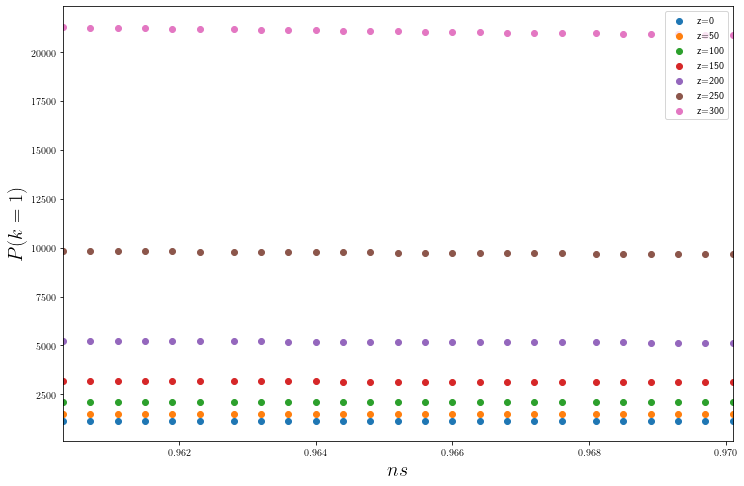

In [10]:
plt.figure(figsize=(12,8))
for i in range(7):
    j = 50*i
    plt.scatter(params[3],pk_new[0][j][448],label='z=%s'%(j))
plt.xlabel('$ns$',size=20)
plt.ylabel('$P(k=1)$',size=20)
plt.xlim(params[3][0],params[3][24])
plt.legend()
# plt.savefig('Omega_b')

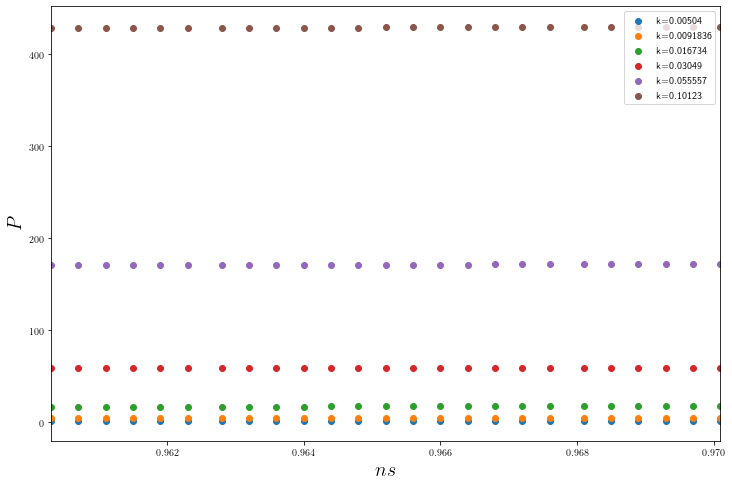

In [11]:
plt.figure(figsize=(12,8))
for i in range(6):
    j = i*30+183
    plt.scatter(params[3],pk_new[0][0][j],label='k=%s'%(kval[j]))
plt.xlabel('$ns$',size=20)
plt.ylabel('$P$',size=20)
plt.xlim(params[3][0],params[3][24])
plt.legend()
# plt.savefig('omegab_ks')

Text(0, 0.5, '$P(k=1)$')

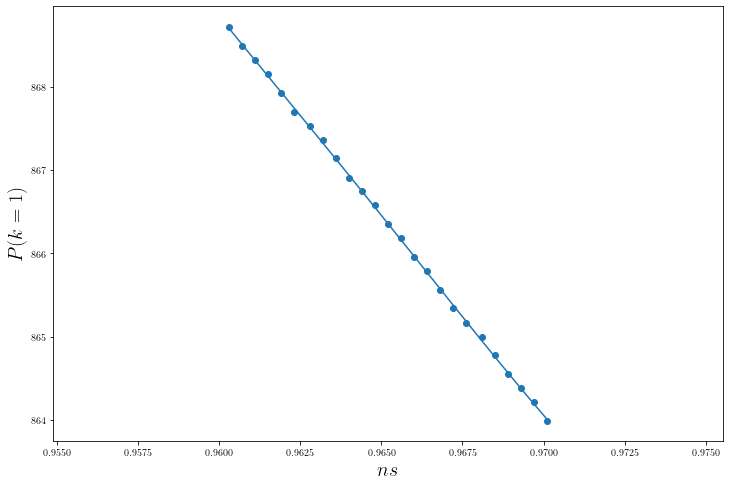

In [12]:
plt.figure(figsize=(12,8))
plt.scatter(params[3],pk_new[0][0][371])
plt.plot(params[3],np.poly1d(np.polyfit(params[3],pk_new[0][0][371],4))(params[3]))
plt.xlabel('$ns$',size=20)
plt.ylabel('$P(k=1)$',size=20)
# plt.savefig('Omega_b_z0')

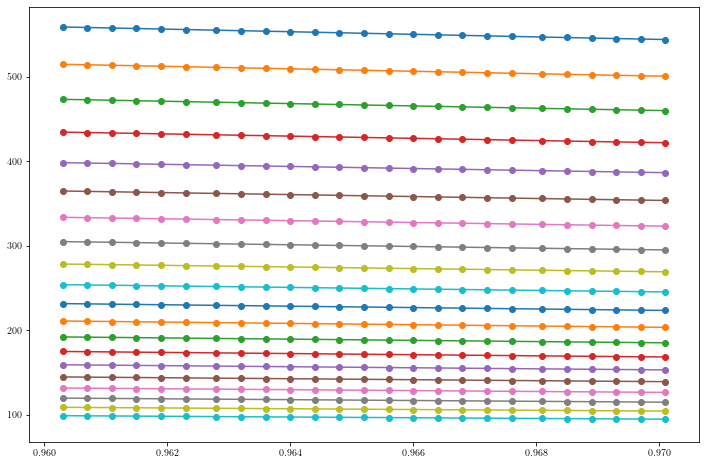

In [13]:
plt.figure(figsize=(12,8))
for i in range(100,120):
    j = i*5
    plt.plot(params[3],np.poly1d(np.polyfit(params[3],pk_new[0][0][j],4))(params[3]))
    plt.scatter(params[3],pk_new[0][0][j])

In [14]:
Chi2 = []
for p in range(1):
    c1 = []
    for z in range(301):
        c2 = []
        for i in range(657):
            fit = np.poly1d(np.polyfit(params[3],pk_new[p][z][i],4))(params[3])
            avg = sum(fit)/len(fit)
            chi2 = sum((fit-pk_new[p][z][i])**2)/sum((fit-avg)**2)
            c2.append(chi2)
        c1.append(c2)
    Chi2.append(c1)
                
                
print(np.shape(Chi2))

(1, 301, 657)


Text(0, 0.5, '$\\chi^2$')

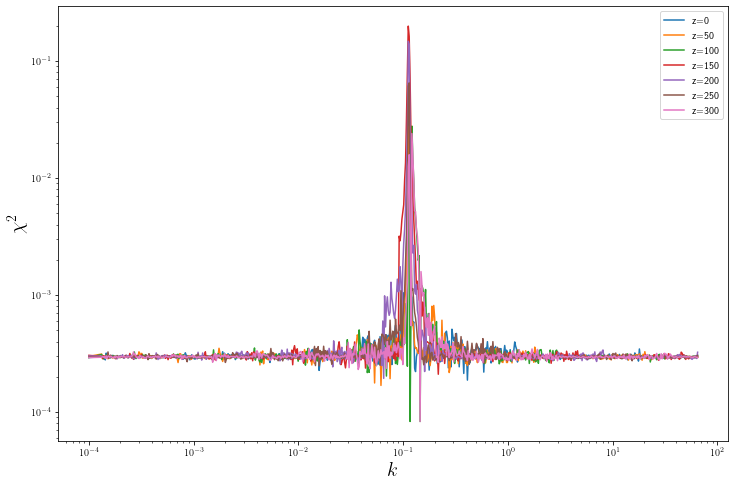

In [15]:
plt.figure(figsize=(12,8))
for i in range(7):
    j = i*50
    plt.loglog(kval,Chi2[0][j],label='z=%s'%(j))
plt.legend()
plt.xlabel('$k$',size=20)
plt.ylabel('$\chi^2$',size=20)
# plt.savefig('Chi2_omegab')

Text(0, 0.5, '$\\chi^2$')

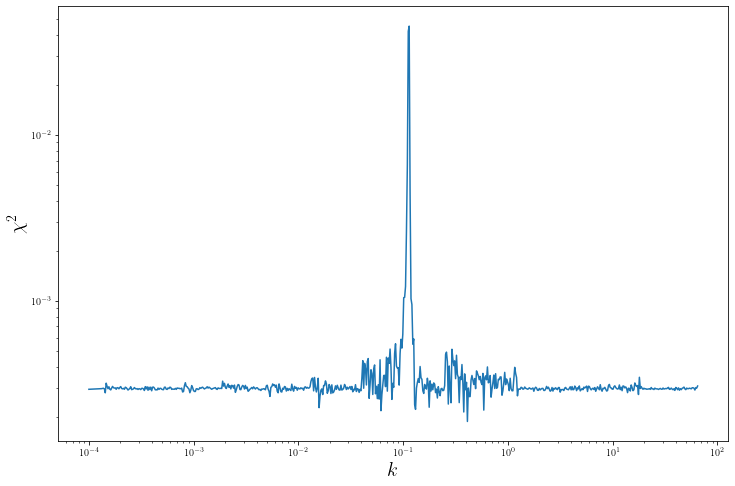

In [16]:
plt.figure(figsize=(12,8))
plt.loglog(kval,Chi2[0][0])
plt.xlabel('$k$',size=20)
plt.ylabel('$\chi^2$',size=20)
# plt.savefig('Chi2_omegab_z0')

In [17]:
# print(np.polyfit(params[0],pk_new[0][0][448],4))
# print(np.poly1d(np.polyfit(params[0],pk_new[0][0][448],4)))
# print(np.poly1d(np.polyfit(params[0],pk_new[0][0][448],4))(params[0]))
# print(np.poly1d(np.polyder(np.polyfit(params[0],pk_new[0][0][448],4))))
# print(np.poly1d(np.polyder(np.polyfit(params[0],pk_new[0][0][448],4)))(params[0]))

In [18]:
k = np.load('../Axion-main/k_ns_fdc.npy')[:,:,:,::-1]
pk = np.load('../Axion-main/pk_ns_fdc.npy')[:,:,:,::-1]

In [19]:
pk_dimless = (np.power(k,3)*pk)/(2*(np.pi**2))
print(np.shape(pk_dimless))

(1, 25, 301, 657)


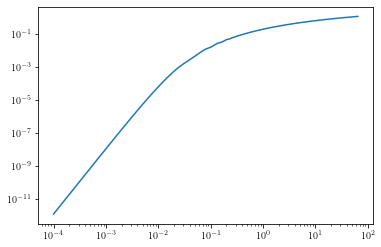

In [20]:
plt.loglog(k[0][12][0],pk_dimless[0][12][0])

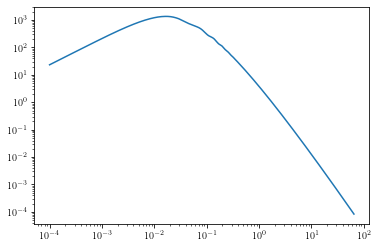

In [21]:
plt.loglog(k[0][12][0],pk[0][12][0])

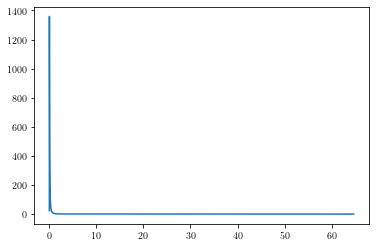

In [22]:
plt.plot(k[0][12][0],pk[0][12][0])

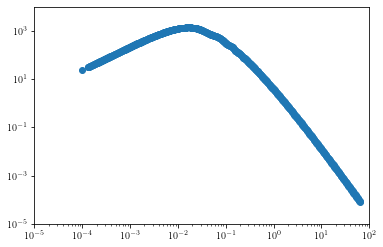

In [23]:
plt.xscale('log')
plt.yscale('log')
plt.xlim(1e-5,1e2)
plt.ylim(1e-5,1e4)
plt.scatter(k[0][12][0],pk[0][12][0])
plt.show()

In [24]:
print(np.poly1d(np.polyfit(np.log(k[0][12][0]),np.log(pk[0][12][0]),4)))
# print(np.poly1d(np.polyfit(np.log(k[0][12][0]),np.log(pk[0][12][0]),4))*(np.log(k[0][12][0])))
print(np.shape(np.poly1d(np.polyfit(np.log(k[0][12][0]),np.log(pk[0][12][0]),4))*(np.log(k[0][12][0]))))

          4           3          2
0.002251 x + 0.02696 x - 0.1826 x - 2.383 x + 1.494
(661,)


In [25]:
logx = np.log(k[0][12][0])
logy = np.log(pk[0][12][0])
print(np.poly1d(np.polyfit(logx,logy,4)))
print(np.poly1d(np.polyfit(logx,logy,4))(logx))

          4           3          2
0.002251 x + 0.02696 x - 0.1826 x - 2.383 x + 1.494
[-8.98074209 -8.94365631 -8.90628125 -8.86857511 -8.8305864  -8.79227002
 -8.75367634 -8.71479142 -8.67559898 -8.63611693 -8.59636455 -8.55636257
 -8.51605376 -8.47545548 -8.43458644 -8.39346675 -8.35207382 -8.31042724
 -8.26850147 -8.22631536 -8.18388916 -8.1412446  -8.09830158 -8.05512989
 -8.01169734 -7.96807923 -7.92418639 -7.88003692 -7.8356503  -7.79110909
 -7.74625055 -7.70121877 -7.65597263 -7.61053413 -7.56485693 -7.51896088
 -7.47286727 -7.42652363 -7.3800257  -7.33332028 -7.28642892 -7.23929184
 -7.1920124  -7.14452971 -7.09686513 -7.04895032 -7.00098969 -6.95272896
 -6.90437766 -6.8557643  -6.80700783 -6.75813312 -6.70905917 -6.65980646
 -6.61050946 -6.56096898 -6.51120192 -6.46134709 -6.41130885 -6.36123444
 -6.31089647 -6.26044214 -6.20989671 -6.15928698 -6.10835837 -6.05741109
 -6.00632857 -5.95513398 -5.90369714 -5.85219201 -5.80064611 -5.74892304
 -5.69721171 -5.64519845 -5.59324798 

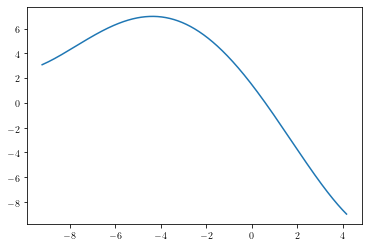

In [26]:
plt.plot(logx,np.poly1d(np.polyfit(logx,logy,4))(logx))

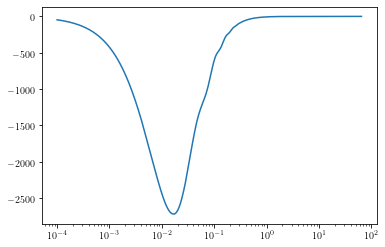

In [27]:
plt.plot(k[0][12][0],np.poly1d(np.polyder(np.polyfit(k[0][12][0],logy,4)))(k[0][12][0])*pk[0][12][0])
plt.xscale('log')

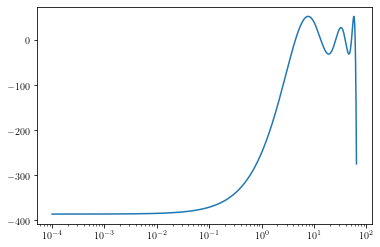

In [70]:
plt.plot(k[0][12][0],np.poly1d(np.polyder(np.polyfit(k[0][12][0],pk[0][12][0],7)))(k[0][12][0]))
plt.xscale('log')

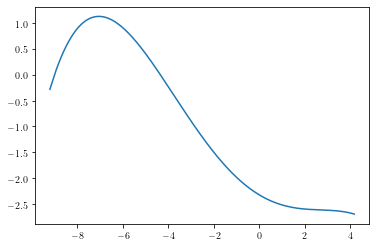

In [28]:
plt.plot(logx,np.poly1d(np.polyder(np.polyfit(logx,logy,5)))(logx))

In [29]:
print(np.polynomial.polynomial.Polynomial.fit(k[0][12][0],pk[0][12][0],4))
print(np.polyfit(k[0][12][0],pk[0][12][0],4))

poly([  155.18385846    41.35302129 -1535.90338153   -96.00354518
  1774.38526368])
[ 1.62084478e-03 -2.12551607e-01  8.98265314e+00 -1.32084047e+02
  4.48329473e+02]


In [30]:
print(np.polyfit(k[0][12][0],pk[0][12][0],4))
print(np.poly1d(np.polyfit(k[0][12][0],pk[0][12][0],4)))
print(np.poly1d(np.polyder(np.polyfit(kval,pk[0][12][0],4))))
# print(np.poly1d(np.polyder(np.polyfit(kval,pk[0][12][0],4)))(kval))

[ 1.62084478e-03 -2.12551607e-01  8.98265314e+00 -1.32084047e+02
  4.48329473e+02]
          4          3         2
0.001621 x - 0.2126 x + 8.983 x - 132.1 x + 448.3
           3          2
-0.006755 x + 0.6192 x - 15.13 x + 71.93


In [31]:
polyder = []
for m in range(1):
    part1 = []
    for p in range(runs):
        part2 = []
        for z in range(301):
            der = np.poly1d(np.polyder(np.polyfit(kval,pk[m][p][z],4)))(kval)
            part2.append(der)
        part1.append(part2)
    polyder.append(part1)

print(np.shape(polyder))

(1, 25, 301, 657)


In [2]:
pk_diff = np.load('../Axion-main/diffder_ns.npy')
print(np.shape(pk_diff))

(25, 8, 1, 554)


In [3]:
kval_diff = np.load('../Axion-main/kval_diff_ns.npy')
print(np.shape(kval_diff))

(554,)


In [34]:
k_trim = np.zeros((1,25,301,554))
pk_trim = np.zeros((1,25,301,554))
dump1 = np.zeros((1,25,301,554))
dump2 = np.zeros((1,25,301,554))
for l in range(1):
    for i in range(runs):
        for y in range(301):
            c = 0
            for j in range(657):
                if j <= 38:
                    k_trim[l][i][y][j] = k[l][i][y][j]
                    pk_trim[l][i][y][j] = pk[l][i][y][j]
                    c = c+1
#                 if j>38 and j%5 == 3:
#                     dump1[l][i][y][j] = k[l][i][y][j]
#                     dump2[l][i][y][j] = pk[l][i][y][j]
                elif j>38 and j%6 != 2:
                    k_trim[l][i][y][c] = k[l][i][y][j]
                    pk_trim[l][i][y][c] = pk[l][i][y][j]
                    c = c+1

print(np.shape(k_trim))                    
print(np.shape(pk_trim))
print(c)

(1, 25, 301, 554)
(1, 25, 301, 554)
554


In [35]:
print(k_trim[0][12][0][180])

1.0097


(554,)


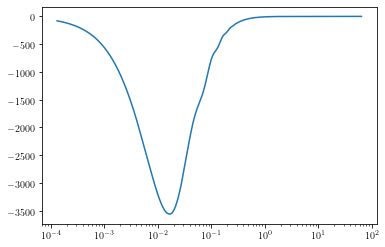

In [36]:
derivative = np.poly1d(np.polyder(np.polyfit(k_trim[0][12][0],np.log(pk_trim[0][12][0]),5)))(k_trim[0][12][0])*pk_trim[0][12][0]
plt.plot(k_trim[0][12][0],derivative)
plt.xscale('log')
print(np.shape(derivative))

In [37]:
print(np.poly1d(np.polyfit(k_trim[0][12][0],pk_trim[0][12][0],5))(k_trim[0][12][0][371]))

465.21789041369783


In [38]:
print(np.poly1d(np.polyfit(k_trim[0][13][0],pk_trim[0][13][0],5))(k_trim[0][13][0][371]))

464.963945911989


In [39]:
print(np.poly1d(np.polyder(np.polyfit(k_trim[0][12][0],pk_trim[0][12][0],5)))(k_trim[0][12][0][371]))

-200.56817940252017


In [40]:
print((465.21789041369783-464.963945911989)/0.0003)

846.4816723627185


In [41]:
fv = [0.02233,0.1198,0.0001,10**-27,67.37,0.9652]
#parameter confidence intervals as given in table 3 of Planck 2015 (arxiv 1502.01589)
 #updated accroding to table 1 of Planck 2018 (arXiv 1807.06209) -- Yang
ci = [0.00015,0.0012,'n/a','n/a',0.54,0.0042]
#number of axioncamb runs for each parameter
runs = 25

omegab = np.round(np.linspace(fv[0]-10*ci[0],fv[0]+10*ci[0],runs),5)
omegac = np.round(np.linspace(fv[1]-10*ci[1],fv[1]+10*ci[1],runs),4)
fa = np.linspace(0.0001,0.025,runs)
omegaax = fv[1]*fa
omegac2 = fv[1]-omegaax
fa_zip = zip(omegac2,omegaax)
h = np.round(np.linspace(fv[4]-ci[4],fv[4]+ci[4],runs),2)
ns = np.round(np.linspace(fv[5]-ci[5],fv[5]+ci[5],runs),4)
print(ns[12],ns[13])

0.9652 0.9655


In [42]:
print(np.poly1d(np.polyder(np.polyfit(k_trim[0][12][0],np.log(pk_trim[0][13][0]),5)))(k_trim[0][12][0][371]))

-2.6247013942897928


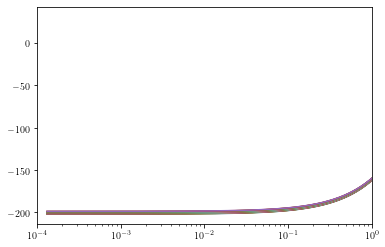

In [43]:
for i in range(25):
    derivative = np.poly1d(np.polyder(np.polyfit(k_trim[0][i][0],(pk_trim[0][i][0]),5)))(k_trim[0][i][0])
    plt.plot(k_trim[0][i][0],derivative)
    plt.xscale('log')
    plt.xlim(1e-4,1)

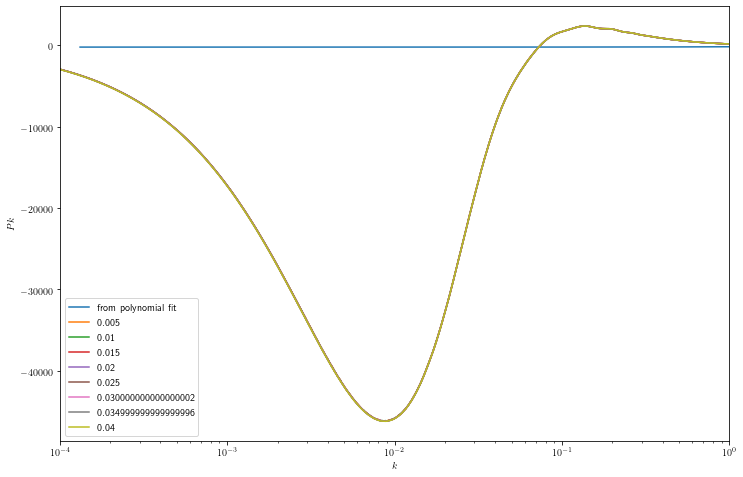

In [44]:
plt.figure(figsize=(12,8))
step = np.linspace(0.005,0.04,8)
plt.plot(k_trim[0][12][0],derivative, label='from polynomial fit')
for i in range(8):
    plt.plot(kval_diff, pk_diff[12][i][0],label=step[i])
    plt.xscale('log')
    plt.xlim(1e-4,1)
    plt.xlabel('$k$')
    plt.ylabel('$Pk$')
    plt.legend()
plt.savefig('ns_diffcompare')

In [45]:
ns_derfit = []
for i in range(25):
    part1 = []
    for j in range(554):
        drvt = np.poly1d(np.polyder(np.polyfit(k_trim[0][i][0],pk_trim[0][i][0],5)))(k_trim[0][i][0])
        part1.append(drvt[j])
    ns_derfit.append(part1)

print(np.shape(ns_derfit))

(25, 554)


In [46]:
print(type(ns_derfit))

<class 'list'>


In [47]:
ns_derfit_param = np.zeros((554,25))
for i in range(25):
    for j in range(554):
        ns_derfit_param[j][i] = ns_derfit[i][j]
    
print(np.shape(ns_derfit_param))

(554, 25)


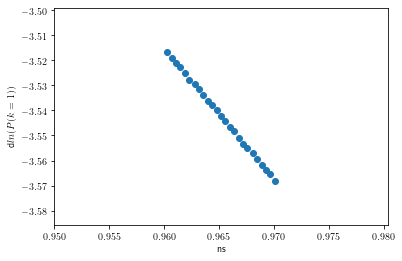

In [48]:
der_k = []
for i in range(25):
    derivative = np.poly1d(np.polyder(np.polyfit(k_trim[0][i][0],np.log10(pk_trim[0][i][0]),5)))(k_trim[0][i][0])*pk_trim[0][i][0]
    der_k.append(derivative[180])


plt.scatter(params[3],der_k)
plt.xlabel('ns')
plt.ylabel('d$ln(P(k=1))$')
plt.savefig('ns_der_k1')

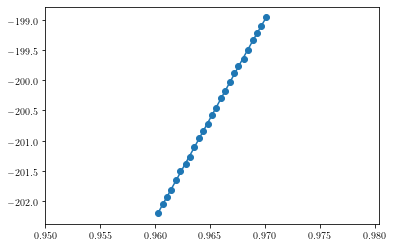

In [49]:
plt.scatter(params[3],ns_derfit_param[371])
# plt.scatter(params[3],der_k)
# plt.plot(params[3],np.poly1d(np.polyfit(params[3],der_k,4))(params[3]))
plt.plot(params[3],np.poly1d(np.polyfit(params[3],ns_derfit_param[371],4))(params[3]))

plt.savefig('ns_difffit_k1')

In [50]:
print(k_trim[0][12][0])

[6.4693e+01 6.3412e+01 6.2157e+01 6.0926e+01 5.9720e+01 5.8537e+01
 5.7378e+01 5.6242e+01 5.5128e+01 5.4036e+01 5.2966e+01 5.1918e+01
 5.0890e+01 4.9882e+01 4.8894e+01 4.7926e+01 4.6977e+01 4.6047e+01
 4.5135e+01 4.4241e+01 4.3365e+01 4.2507e+01 4.1665e+01 4.0840e+01
 4.0031e+01 3.9239e+01 3.8462e+01 3.7700e+01 3.6953e+01 3.6222e+01
 3.5504e+01 3.4801e+01 3.4112e+01 3.3437e+01 3.2775e+01 3.2126e+01
 3.1490e+01 3.0866e+01 3.0255e+01 2.9656e+01 2.9069e+01 2.8493e+01
 2.7929e+01 2.7376e+01 2.6302e+01 2.5782e+01 2.5271e+01 2.4771e+01
 2.4280e+01 2.3328e+01 2.2866e+01 2.2413e+01 2.1970e+01 2.1535e+01
 2.0690e+01 2.0280e+01 1.9879e+01 1.9485e+01 1.9099e+01 1.8351e+01
 1.7987e+01 1.7631e+01 1.7282e+01 1.6940e+01 1.6275e+01 1.5953e+01
 1.5637e+01 1.5328e+01 1.5024e+01 1.4435e+01 1.4149e+01 1.3869e+01
 1.3594e+01 1.3325e+01 1.2803e+01 1.2549e+01 1.2301e+01 1.2057e+01
 1.1818e+01 1.1355e+01 1.1130e+01 1.0910e+01 1.0694e+01 1.0482e+01
 1.0071e+01 9.8716e+00 9.6761e+00 9.4845e+00 9.2967e+00 8.9322

In [51]:
print(np.where(k_trim[0][12][0]==1.0354e-02))

(array([371]),)


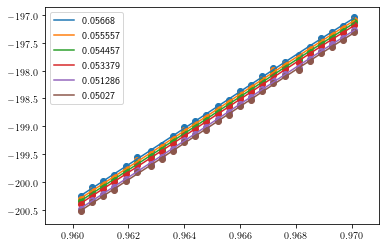

In [52]:
for i in range(6):
    j = i+300
    plt.scatter(params[3],ns_derfit_param[j])
    plt.plot(params[3],np.poly1d(np.polyfit(params[3],ns_derfit_param[j],4))(params[3]),label=k_trim[0][12][0][j])
    plt.xlim(0.959,0.971)
    plt.legend()

plt.savefig('ns_difffit_k')

In [53]:
Chisq = []
for i in range(8):
    avg=sum(pk_diff[12][i][0])/len(pk_diff[12][i][0])
    Chisq.append((sum((pk_diff[12][i][0]-derivative)**2))/sum((pk_diff[12][i][0]-avg)**2))

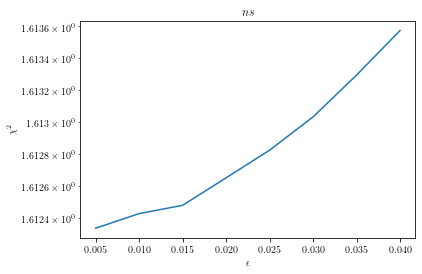

In [54]:
plt.plot(step, Chisq)
plt.yscale('log')
plt.title('$ns$')
plt.xlabel('$\epsilon$')
plt.ylabel('$\chi^2$')
plt.savefig('ns_diff_chi2')

In [55]:
mergek = np.load('../Axion-main/ns_mergek.npy')
mergepk = np.load('../Axion-main/ns_mergepk.npy')

In [56]:
print(np.shape(mergek))
print(np.shape(mergepk))

(50, 8, 1, 554)
(50, 8, 1, 554)


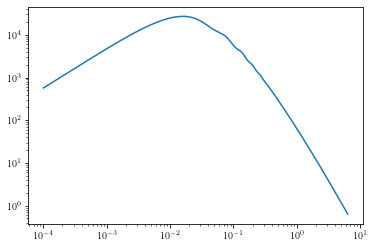

In [58]:
plt.loglog(mergek[12][0][0],mergepk[12][0][0])

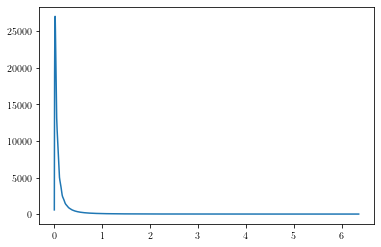

In [57]:
plt.plot(mergek[12][0][0],mergepk[12][0][0])

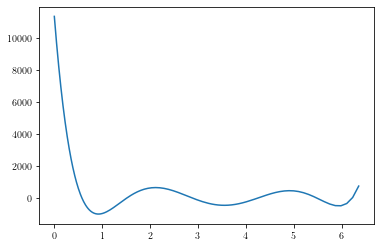

In [59]:
plt.plot(mergek[12][0][0],np.poly1d(np.polyfit(mergek[12][0][0],mergepk[12][0][0],6))(mergek[12][0][0]))

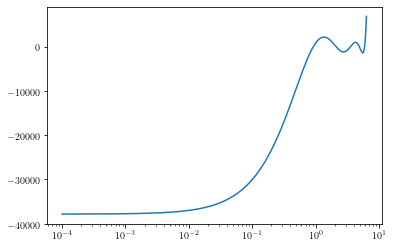

In [60]:
der = np.poly1d(np.polyder(np.polyfit(mergek[12][0][0],mergepk[12][0][0],7)))(mergek[12][0][0])
plt.plot(mergek[12][0][0], der)
plt.xscale('log')

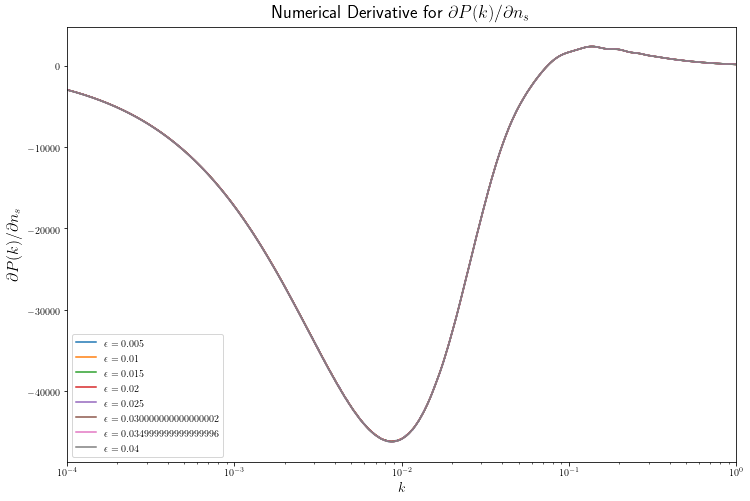

In [4]:
plt.figure(figsize=(12,8))
step = np.linspace(0.005,0.04,8)
# plt.plot(mergek[12][0][0],der, label='from polynomial fit')
for i in range(8):
    plt.plot(kval_diff, pk_diff[12][i][0],label=r'$\epsilon=%s$'%(step[i]))
    plt.xscale('log')
    plt.xlim(1e-4,1)
    plt.xlabel('$k$',fontsize=14)
    plt.ylabel('$\partial P(k)/\partial n_s$',fontsize=16)
    plt.title('Numerical Derivative for $\partial P(k)/\partial n_s$',fontsize=18)
    plt.legend()
    
plt.savefig('numder_ns.pdf',bbox_inches='tight')

/tmp/ipykernel_2865189/1736051318.py:6: RankWarning: Polyfit may be poorly conditioned
  der_trim.append(np.poly1d(np.polyder(np.polyfit(k_trim_reshape[0][0][i],pk_trim_reshape[0][0][i],5)))(k_trim_reshape[0][0][i]))
/tmp/ipykernel_2865189/1736051318.py:6: RankWarning: Polyfit may be poorly conditioned
  der_trim.append(np.poly1d(np.polyder(np.polyfit(k_trim_reshape[0][0][i],pk_trim_reshape[0][0][i],5)))(k_trim_reshape[0][0][i]))


(554, 25)


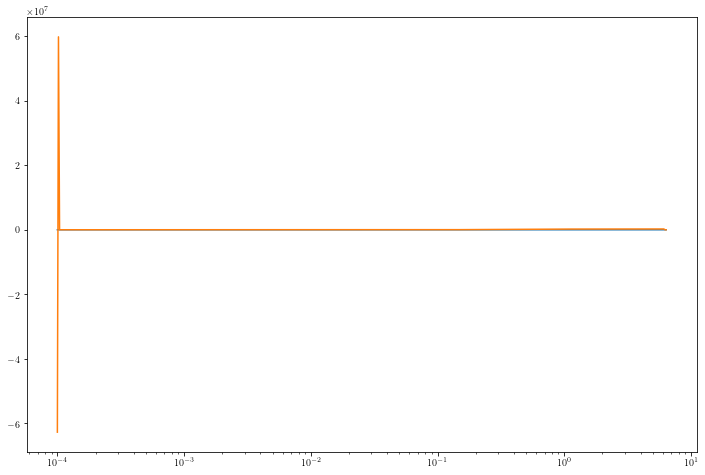

In [160]:
k_trim_reshape = np.reshape(k_trim,(1,301,554,25))
pk_trim_reshape = np.reshape(pk_trim,(1,301,554,25))

der_trim = []
for i in range(554):
    der_trim.append(np.poly1d(np.polyder(np.polyfit(k_trim_reshape[0][0][i],pk_trim_reshape[0][0][i],5)))(k_trim_reshape[0][0][i])) 
print(np.shape(der_trim))
der_trim_reshape = np.reshape(der_trim,(25,554))

plt.figure(figsize=(12,8))
plt.plot(mergek[12][0][0], pk_diff[12][0][0], label='from finite difference')
plt.plot(mergek[12][0][0], der_trim_reshape[12], label='from polynomial fit')
plt.xscale('log')

In [61]:
Chisquare = []
for i in range(8):
    avg=sum(pk_diff[12][i][0])/len(pk_diff[12][i][0])
    Chisquare.append((sum((pk_diff[12][i][0]-der)**2))/sum((pk_diff[12][i][0]-avg)**2))

Text(0, 0.5, '$\\chi^2$')

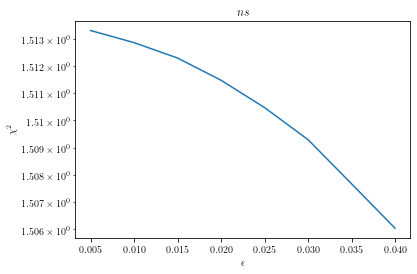

In [62]:
plt.plot(step, Chisquare)
plt.yscale('log')
plt.title('$ns$')
plt.xlabel('$\epsilon$')
plt.ylabel('$\chi^2$')

In [80]:
print(np.polynomial.polynomial.Polynomial.fit(mergek[12][0][0],mergepk[12][0][0],7))
print(np.polynomial.polynomial.polyder(np.polynomial.polynomial.Polynomial.fit(mergek[12][0][0],mergepk[12][0][0],7)))

poly([  -307.25715805  -2472.0779994    8858.28758393  15332.56262633
 -34258.3419231  -17303.5947985   31731.79118623   -892.63279191])
[Polynomial([0.], domain=[1.0000e-04, 6.3577e+00], window=[-1.,  1.])]


In [79]:
der_new = np.polynomial.polynomial.polyval(np.polynomial.polynomial.polyder(np.polynomial.polynomial.Polynomial.fit(mergek[12][0][0],mergepk[12][0][0],7)))(mergek[12][0][0])
plt.plot(mergek[12][0][0], der_new)
plt.xscale('log')

TypeError: polyval() missing 1 required positional argument: 'c'

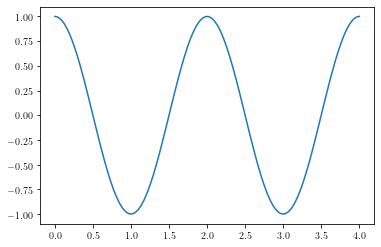

In [83]:
xval = np.linspace(0,4,100)
plt.plot(xval,np.cos(xval*np.pi))

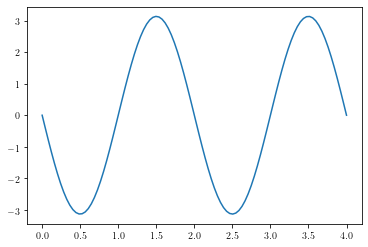

In [84]:
plt.plot(xval,-np.pi*np.sin(xval*np.pi))

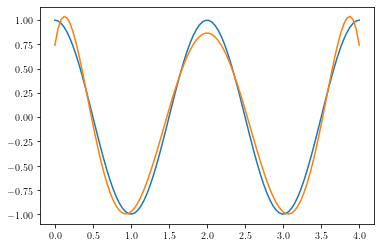

In [109]:
plt.plot(xval,np.cos(xval*np.pi),label='original function')
plt.plot(xval,np.poly1d(np.polyfit(xval,np.cos(xval*np.pi),6))(xval))

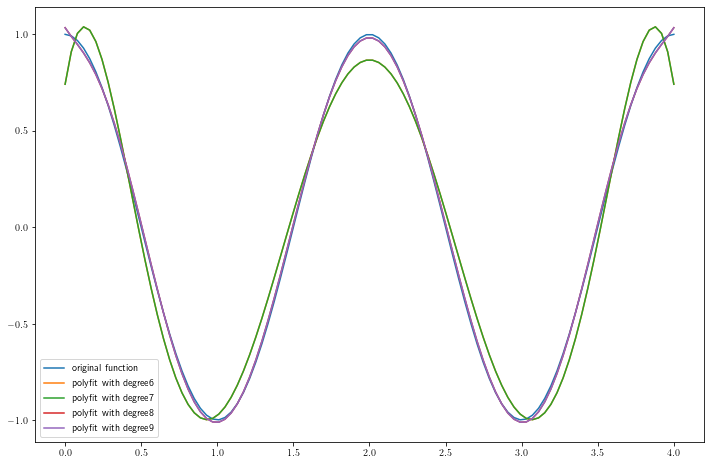

In [110]:
plt.figure(figsize=(12,8))
plt.plot(xval,np.cos(xval*np.pi),label='original function')
for i in range(6,10):
    plt.plot(xval,np.poly1d(np.polyfit(xval,np.cos(xval*np.pi),i))(xval),label='polyfit with degree%s'%(i))

plt.legend()
plt.savefig('cosfit_compare')

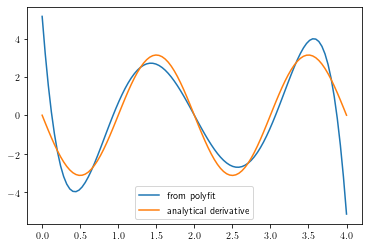

In [93]:
plt.plot(xval,np.poly1d(np.polyder(np.polyfit(xval,np.cos(xval*np.pi),6)))(xval),label='from polyfit')
plt.plot(xval,-np.pi*np.sin(xval*np.pi),label='analytical derivative')
plt.legend()

In [113]:
increment = 0.001
cosder = []
for i in range(len(xval)):
    finitediff = (np.cos(xval[i]*(np.pi+increment))-np.cos(xval[i]*(np.pi-increment)))/(2*increment)
    cosder.append(finitediff)

print(np.shape(cosder))

(100,)


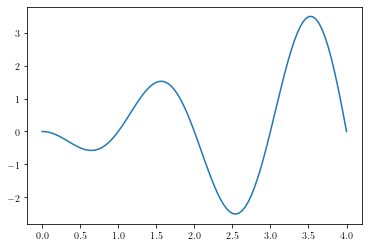

In [114]:
plt.plot(xval,cosder)

In [117]:
print((np.polyfit(xval,np.cos(xval*np.pi),6)))
print(type(np.polyfit(xval,np.cos(xval*np.pi),6)))

[ -0.30622422   3.6746907  -16.23806427  31.91276219 -25.91801241
   5.15675529   0.74125383]
<class 'numpy.ndarray'>


In [122]:
cval = np.linspace(0.5*np.pi,1.5*np.pi,100)
print((np.polyfit(cval,np.cos(xval*np.pi),6)))
print(np.poly1d(np.polyfit(cval,np.cos(xval*np.pi),6)))

[-1.30466874e+00  2.45924263e+01 -1.87536466e+02  7.38535948e+02
 -1.57992504e+03  1.73691559e+03 -7.65543885e+02]
        6         5         4         3        2
-1.305 x + 24.59 x - 187.5 x + 738.5 x - 1580 x + 1737 x - 765.5


In [146]:
cder = []
for i in range(len(xval)):
    cder.append(np.poly1d(np.polyder(np.polyfit(xval,np.cos(xval*np.pi),6)))(xval))
    
print(np.shape(cder))

(100, 100)


In [143]:
increment = 0.001
fntder = []
for i in range(len(cval)):
    finitediff = (np.cos(xval[49]*(cval[i]+increment))-np.cos(xval[49]*(cval[i]-increment)))/(2*increment)
    fntder.append(finitediff)

print(np.shape(fntder))

(100,)


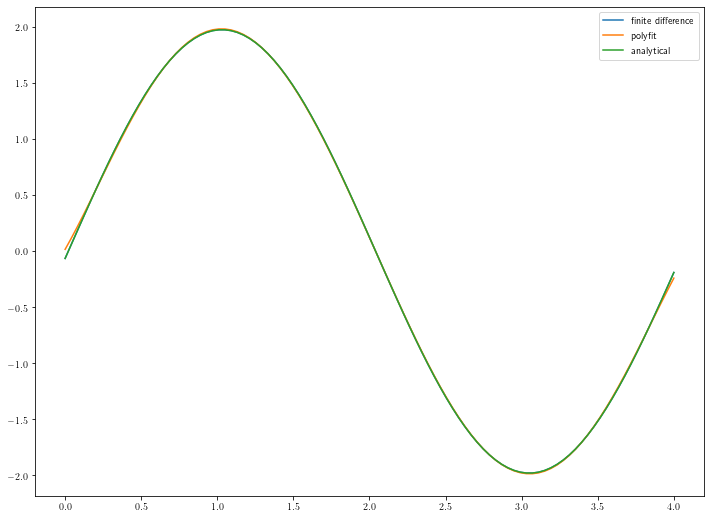

In [150]:
plt.figure(figsize=(12,9))
plt.plot(xval,fntder,label='finite difference')
plt.plot(xval,np.poly1d(np.polyder(np.polyfit(cval,np.cos(xval[49]*cval),6)))(cval),label='polyfit')
plt.plot(xval,-xval[49]*np.sin(cval*xval[49]),label='analytical')
plt.legend()

plt.savefig('cosc')

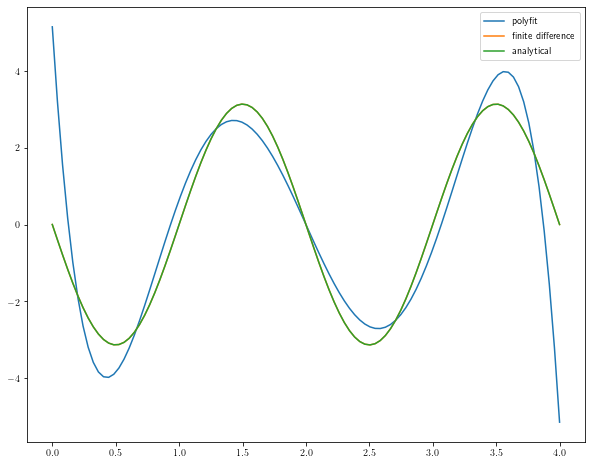

In [103]:
plt.figure(figsize=(10,8))
plt.plot(xval,np.poly1d(np.polyder(np.polyfit(xval,np.cos(xval*np.pi),6)))(xval),label='polyfit')
plt.plot(xval,cosder,label='finite difference')
plt.plot(xval,-np.pi*np.sin(xval*np.pi),label='analytical')
plt.legend()

plt.savefig('cosder_test')